# Wine Dataset
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/wine_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/wine.csv)

In [1]:
#importing some necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)


from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

from imblearn.over_sampling import SMOTE

In [2]:
names=['target','Alcohol','Malic_acid','Ash','Alcalinity_ash','Magnesium','Total_phenols','Flavanoids','Non-flavanoids_phenols','Proanthocyanins','Color_intensity','Hue','Diluted_wines','Proline']
data = pd.read_csv('../../Lab1/Romil/Data/wine.csv',header=None,names=names)
data.head()

,target,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Non-flavanoids_phenols,Proanthocyanins,Color_intensity,Hue,Diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
#selecting only first two features
X = pd.DataFrame(data,  columns=['Alcohol','Hue']).values
y = data.target.values

In [5]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#### Scaling the train and test sets.


In [6]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
#Fitting the model
lr = LogisticRegression( random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
#Getting mean accuracy
lr.score(X_test_std,y_test)

0.9074074074074074

In [9]:
y_pred = lr.predict(X_test_std)

In [10]:
y_test.shape

(54,)

In [11]:
# Number of samples accurately classified
print(metrics.accuracy_score(y_test, y_pred, normalize=False),'correcly classified out of',len(y_test))

49 correcly classified out of 54


In [12]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [13]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

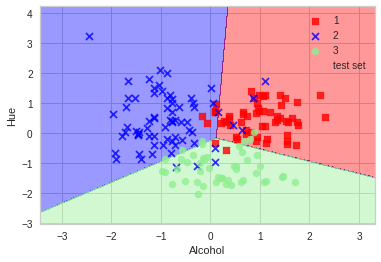

In [14]:
plot_decision_regions(X_combined,
                      y_combined, classifier=lr,
                      test_idx=range(124,178))
plt.xlabel("Alcohol")
plt.ylabel("Hue")
plt.legend()

In [15]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

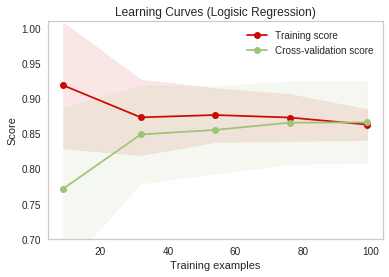

In [16]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train_std, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


## Confusion matrix

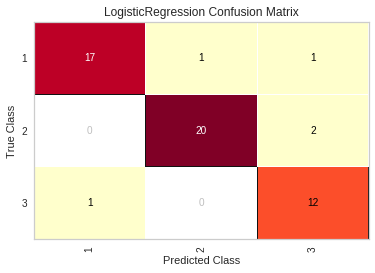

In [17]:
#Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(lr, classes=[1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

## Classification report

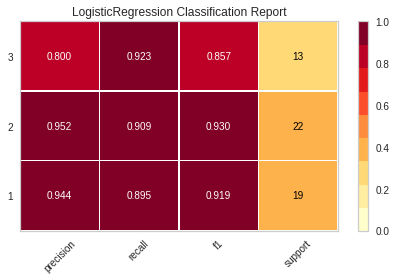

In [18]:

# Generating the classification report containing measures of precision, recall and F1-score

visualizer = ClassificationReport(lr, support=True)

visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()